# **2. [텍스트 전처리_Text preprocessing](https://wikidocs.net/21694)**

In [3]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [4]:
print('단어 토큰화1 :',word_tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화1 : ['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


In [5]:
print('단어 토큰화2 :',WordPunctTokenizer().tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화2 : ['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


In [6]:
print('단어 토큰화3 :',text_to_word_sequence("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화3 : ["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


### **텍스트 전처리는 예측모형에 투입될 자료를 수자로 representation하는 것**

In [8]:
import random

# 1. 샘플 데이터 생성
good_phrases = [
    "profit increased", "positive earnings", "successful project", "growth in revenue",
    "market share improved", "customer satisfaction", "new product launch", "record high sales",
    "investment success", "expansion completed"
]
bad_phrases = [
    "loss reported", "negative growth", "project failed", "revenue dropped",
    "market share declined", "customer complaints", "recall issued", "sales declined",
    "investment failed", "shutdown announced"
]

# 각 100개씩 생성
good_news = [f"This is a {random.choice(good_phrases)}." for _ in range(100)]
bad_news = [f"This is a {random.choice(bad_phrases)}." for _ in range(100)]

texts = good_news + bad_news
labels = [1]*100 + [0]*100  # good = 1, bad = 0

In [11]:
import pandas as pd

# 2. 데이터프레임 구성
df = pd.DataFrame({'text': texts, 'label': labels})
df

,text,label
0,This is a expansion completed.,1
1,This is a customer satisfaction.,1
2,This is a customer satisfaction.,1
3,This is a customer satisfaction.,1
4,This is a investment success.,1
...,...,...
195,This is a sales declined.,0
196,This is a recall issued.,0
197,This is a sales declined.,0
198,This is a sales declined.,0


In [12]:
from sklearn.feature_extraction.text import CountVectorizer

# 3. CountVectorizer로 벡터화
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])
y = df['label']

In [13]:
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 849 stored elements and shape (200, 37)>

In [14]:
X.toarray()

array([[0, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [15]:
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

,announced,complaints,completed,customer,declined,dropped,earnings,expansion,failed,growth,...,record,reported,revenue,sales,satisfaction,share,shutdown,success,successful,this
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
197,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
198,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


# **2. 예측 모형**
## **Model = Algorithm(X, y), 지도학습**
## **사후학습 모델(Posttrained Model)과 사전학습 모델(Pretrained Model)**
### **GPT(Generative Pre Trained)**

In [21]:
from sklearn.model_selection import train_test_split

# 4. train/test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)

(160, 37) (160,)


In [39]:
train_test_split(range(20), [0,1]*10, test_size=0.2)

[[8, 12, 10, 7, 5, 4, 14, 3, 17, 2, 11, 1, 16, 9, 0, 6],
 [13, 15, 19, 18],
 [0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0],
 [1, 1, 1, 0]]

In [40]:
from sklearn.linear_model import LogisticRegression

# 5. 로지스틱 회귀로 모델 훈련
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [41]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [42]:
from sklearn.metrics import classification_report, accuracy_score

# 6. 예측 및 평가
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



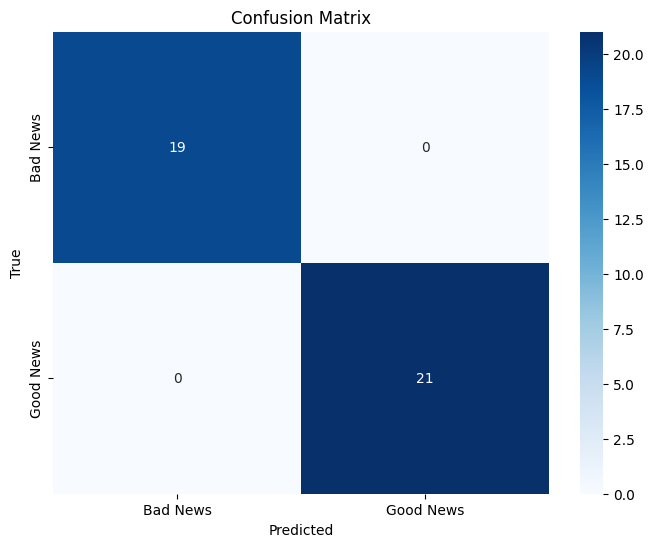

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from the previous code

cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Bad News", "Good News"],
            yticklabels=["Bad News", "Good News"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

## **🤗 Hugingface Open Source LLM(Large Language Model)**

In [44]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")

results = classifier(["We are very happy to show you the 🤗 Transformers library.",
                     "We hope you don't hate it."])
for result in results:
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


label: POSITIVE, with score: 0.9998
label: NEGATIVE, with score: 0.5309


In [50]:
tf = df.sample(5)
tf

,text,label
96,This is a profit increased.,1
48,This is a investment success.,1
173,This is a investment failed.,0
8,This is a market share improved.,1
160,This is a market share declined.,0


In [52]:
# prompt: tf DataFrame 사용: classifier = pipeline("sentiment-analysis")로 text를 예측하고  결과와 확률을 추가 컬럼으로 만들어줘

import pandas as pd
from transformers import pipeline
# Assuming 'tf' is your DataFrame

# Create a sentiment analysis pipeline
classifier = pipeline("sentiment-analysis")

# Function to predict sentiment and return label and score
def predict_sentiment(text):
    result = classifier(text)[0]  # Get the first result (since it is a list)
    return result['label'], result['score']

# Apply the function to the 'text' column, creating two new columns
df[['predicted_label', 'predicted_score']] = df['text'].apply(lambda x: pd.Series(predict_sentiment(x)))

# Display the updated DataFrame
df


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


,text,label,predicted_label,predicted_score
0,This is a expansion completed.,1,POSITIVE,0.998421
1,This is a customer satisfaction.,1,POSITIVE,0.998747
2,This is a customer satisfaction.,1,POSITIVE,0.998747
3,This is a customer satisfaction.,1,POSITIVE,0.998747
4,This is a investment success.,1,POSITIVE,0.999858
...,...,...,...,...
195,This is a sales declined.,0,NEGATIVE,0.999598
196,This is a recall issued.,0,NEGATIVE,0.996583
197,This is a sales declined.,0,NEGATIVE,0.999598
198,This is a sales declined.,0,NEGATIVE,0.999598


In [61]:
df['predicted_label'] = df['predicted_label'].apply(lambda x: 1 if x == 'POSITIVE' else 0)

In [62]:
df.head()

,text,label,predicted_label,predicted_score
0,This is a expansion completed.,1,1,0.998421
1,This is a customer satisfaction.,1,1,0.998747
2,This is a customer satisfaction.,1,1,0.998747
3,This is a customer satisfaction.,1,1,0.998747
4,This is a investment success.,1,1,0.999858


In [67]:
(df['label'] == df['predicted_label']).sum()

np.int64(200)

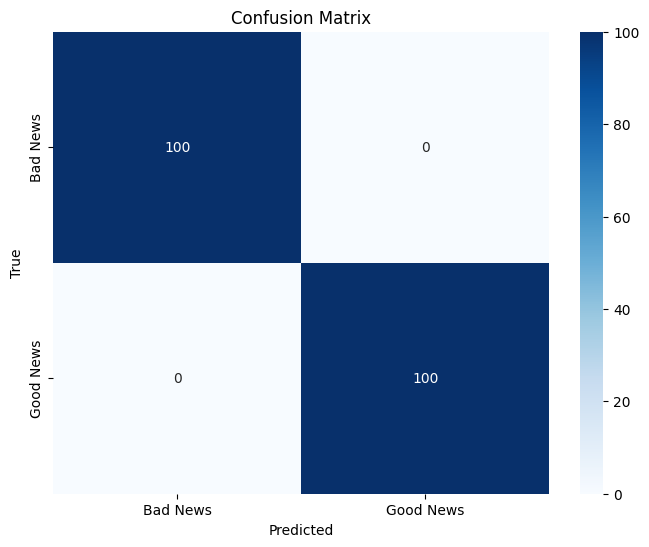

In [63]:
cm = confusion_matrix(df['label'], df['predicted_label'])

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Bad News", "Good News"],
            yticklabels=["Bad News", "Good News"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### from transformers import pipeline, classifier = pipeline("sentiment-analysis")
### Pretrained Model